In [1]:
#imports
import numpy as np
import numpy.random as rd
import numpy.linalg as linalg
import math
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [2]:
def sample(prob): # BS can be done
    r = rd.random();i = 0
    while r > prob[i]:
        r-=prob[i]
        i+=1
    return i

def bernoulli(prob):
    if rd.random() > prob:
        return 1.0
    return 0.0

def row_normalize(arr):
    arr = np.array(arr,float)
    for i in range(np.shape(arr)[0]):
        arr[i] = arr[i]/np.sum(arr[i])
    return arr

def normalize(arr):
    arr = np.array(arr,float)
    return arr/np.sum(arr)

def dot(x,y):
    return np.sum(np.multiply(x,y))

def steady_state_prob(matrix):
    """
    This function calculates relative throughput from a probability matrix
    :param matrix: the probability matrix
    :return: A list of relative throughput values
    """
    a_list = []
    b_list = []
    for v in matrix:
        a_list.append(1)
        b_list.append(0)
    b_list.append(1)
    A = np.append(np.transpose(matrix) - np.identity(len(matrix)), [a_list], axis=0)
    b = np.transpose(np.array(b_list))
    return np.linalg.solve(np.transpose(A).dot(A), np.transpose(A).dot(b))

In [33]:
# example 1
en = 3
ch = 3
P = np.array([[.1, .2, .7],[.5, .3, .2],[.3, .3, .4]])
E = np.array([[.5,.6,.4],[.2,.3,.1],[.4,.5,.3]])
R = np.array([8.,6.,4.])
tol = .3
print(P)
print(E)
print(R)
print(tol)

[[0.1 0.2 0.7]
 [0.5 0.3 0.2]
 [0.3 0.3 0.4]]
[[0.5 0.6 0.4]
 [0.2 0.3 0.1]
 [0.4 0.5 0.3]]
[8. 6. 4.]
0.3


In [23]:
# example 2
en = 5
ch = 4
P = np.array([[.35,.15,.05,.45],[.3,.3,.2,.2],[.3,.4,.1,.2],[.2,.15,.25,.4]])
E = np.array([[.4,.6,.4,.3],[.3,.4,.4,.3],[.3,.2,.1,.4],[.1,.35,.3,.4],[.2,.4,.1,.3]])
R = np.array([7.,5.5,4.,6.,5.])
tol = .35
print(P)
print(E)
print(R)
print(tol)

[[0.35 0.15 0.05 0.45]
 [0.3  0.3  0.2  0.2 ]
 [0.3  0.4  0.1  0.2 ]
 [0.2  0.15 0.25 0.4 ]]
[[0.4  0.6  0.4  0.3 ]
 [0.3  0.4  0.4  0.3 ]
 [0.3  0.2  0.1  0.4 ]
 [0.1  0.35 0.3  0.4 ]
 [0.2  0.4  0.1  0.3 ]]
[7.  5.5 4.  6.  5. ]
0.35


In [3]:
# example 2
en = 6
ch = 8
P = np.array([[.35,.2,.05,.45,.2,.15,.2,.4],[.3,.3,.2,.2,.35,.15,.05,.45],[.3,.15,.2,.25,.35,.45,.1,.2],[.35,.35,.2,.2,.2,.1,.2,.4],[.2,.15,.25,.4,.35,.15,.05,.45],[.2,.3,.2,.2,.2,.15,.3,.45],[.35,.15,.05,.45,.3,.4,.1,.2],[.2,.15,.25,.4,.4,.25,.15,.2]])/2
E = np.array([[.4,.6,.4,.3,.1,.35,.3,.4],[.3,.4,.4,.3,.3,.35,.25,.4],[.3,.2,.1,.4,.3,.4,.4,.3],[.4,.3,.3,.5,.6,.4,.55,.35],[.2,.4,.1,.3,.4,.4,.3,.1],[.4,.6,.4,.3,.6,.4,.3,.1]])/2
R = np.array([4.,3.5,4.,8.,2.,3.])
tol = .2
print(P)
print(E)
print(R)

[[0.175 0.1   0.025 0.225 0.1   0.075 0.1   0.2  ]
 [0.15  0.15  0.1   0.1   0.175 0.075 0.025 0.225]
 [0.15  0.075 0.1   0.125 0.175 0.225 0.05  0.1  ]
 [0.175 0.175 0.1   0.1   0.1   0.05  0.1   0.2  ]
 [0.1   0.075 0.125 0.2   0.175 0.075 0.025 0.225]
 [0.1   0.15  0.1   0.1   0.1   0.075 0.15  0.225]
 [0.175 0.075 0.025 0.225 0.15  0.2   0.05  0.1  ]
 [0.1   0.075 0.125 0.2   0.2   0.125 0.075 0.1  ]]
[[0.2   0.3   0.2   0.15  0.05  0.175 0.15  0.2  ]
 [0.15  0.2   0.2   0.15  0.15  0.175 0.125 0.2  ]
 [0.15  0.1   0.05  0.2   0.15  0.2   0.2   0.15 ]
 [0.2   0.15  0.15  0.25  0.3   0.2   0.275 0.175]
 [0.1   0.2   0.05  0.15  0.2   0.2   0.15  0.05 ]
 [0.2   0.3   0.2   0.15  0.3   0.2   0.15  0.05 ]]
[4.  3.5 4.  8.  2.  3. ]


In [34]:
ub = np.sum(E*steady_state_prob(P),axis=1)
ltemp = linprog(c = -1*R, A_ub = [ub], b_ub = [tol],A_eq = np.ones((1,en)),b_eq = [1.0],method='simplex')
print(min(ub))
print(dot(ltemp.x,R), np.sum(ltemp.x),ltemp.con, ltemp.success, dot(ltemp.x,ub))
org_x = ltemp.x
print(ltemp.x)

0.18360655737704917
6.775956284153006 1.0 [0.] True 0.3
[0.38797814 0.61202186 0.        ]


In [35]:
xub = E.transpose();tol_arr = [tol]*ch
ltemp = linprog(c=np.zeros(en),A_ub = xub,b_ub=tol_arr,A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-3})
print(ltemp.success)
x0 = np.transpose(row_normalize([ltemp.x])) # noise to safe to avoid singular matrices, 1.0e-2 is working
norm_x0 = linalg.norm(x0)
e0 = x0/norm_x0 # safe vector
e0_trans = e0.transpose()
en0 = sample(x0.transpose()[0])
c_arr = []
temp_ch = [0]
for i in range(500):
    temp_ch.append(sample(P[temp_ch[-1]]))
    c_arr.append(1.0-bernoulli(E[sample(x0)][temp_ch[-1]]))
c0 = np.mean(c_arr)
print(np.sum(x0))
print(x0.flatten())
print(c0,dot(x0.flatten(),R))

True
1.0
[0. 1. 0.]
0.186 6.0


In [54]:
# parameters
reg = 0.1 # lambda > 0, regualarization param
conf = 0.1 # delta >= 0, <= 1, confidence prob -> with 1-del prob tolerance holds
alfa_c = 0.1 # >= 1, ellipse radii, best : 0.001
Sa = 1.;La = 1.;Ra = 1. # assumption parameters
R_sum = np.sum(R)
Rn_trans = R/R_sum
Rn = np.transpose([Rn_trans])
S = 100
# x = [np.transpose(row_normalize([np.ones(en)]))]
x = [x0]
r = [dot(x[-1],Rn)];c = [c0]
b = [0]; enc = [rd.randint(en)];chnl = [rd.randint(ch)]
avg_rate = []
# markov extra param
p = []
# p.append(row_normalize(np.random.rand(ch,ch)))
p.append(row_normalize(np.ones((ch,ch))))

In [55]:
# algo
iop = np.identity(en) - (np.matmul(x0,x0.transpose())/pow(norm_x0,2.0))
sigopt = reg*iop; uopt = 0.0
sprob = steady_state_prob(p[-1])
val = 1 - e0*np.sum(e0); val = np.array([[i for i in val.flatten()]])
gama = 1.0/float(2.0*en)
alfa_c = alfa_c/math.sqrt(float(en))
for t in range(1,5000):
    temp_b = []
    for s in range(S):
        enc.append(sample(x[-1].transpose()[0]))
        chnl.append(sample(P[chnl[-1]]))
        temp_b.append(int(bernoulli(E[enc[-1]][chnl[-1]])))
    b.append(np.mean(temp_b))
    # HMM
    model = hmm.MultinomialHMM(n_components=ch, params='t', init_params='',n_iter=100, tol=1.0e-2)
    model.startprob_ = steady_state_prob(p[-1])
    step_emiss = np.sum(x[-1]*E,axis=0)
    model.emissionprob_ = [[step_emiss[i],1-step_emiss[i]] for i in range(ch)]
    model.transmat_ = np.copy(p[-1])
    model.fit([temp_b]) #here
    p.append(((p[-1]*float(3*(t-1)))+model.transmat_)/float(3*t-2))
    # OPLB
    r.append(dot(x[-1],Rn))
    # c.append(np.max([dot(x[-1].transpose(),i) for i in np.matmul(p[-1],E.transpose())]))
    c.append(dot(x[-1],np.matmul(E,steady_state_prob(p[-1]))))
    copt = c[-1] - (dot(x[-1],e0)/norm_x0)*c[0]
    xopt = x[-1] - (dot(x[-1],e0)*e0)
    sigopt += np.matmul(xopt,xopt.transpose())
    uopt += (copt*xopt)
    muopt = np.matmul(linalg.pinv(sigopt),uopt) # (inverse is blowing up, singular matrices) so did pseudo(SVD)
    ub = ((c0/norm_x0)*e0_trans)+muopt.transpose()-(dot(e0,muopt)*e0_trans)
    betat = Ra*math.sqrt(en*math.log10((1+(t-1)*La*La/reg)/conf))+math.sqrt(reg)*Sa # used log10
    # print(np.mean(ub),alfa_c*betat*np.mean(val),tol+(alfa_c*betat*err))
    alfact = alfa_c # /math.pow(float(t),0.5)
    try:
        ltemp = linprog(c = -1*Rn_trans, A_ub = ub + alfact*betat*val, b_ub = [tol+(alfact*betat*gama)],A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-2})
    except:
        print(t,'skipped')
        break
        continue
    # print(ub[0])
    x.append(np.transpose(row_normalize([ltemp.x])))
    avg_rate.append(dot(x[-1],Rn)*R_sum)
    print(t,round(avg_rate[-1],5),round(1.0-np.mean(b),4),round(np.sum(np.abs(P-p[-1]))*100/float(ch*ch),4),ltemp.success,end='\n')

1 8.0 0.585 11.772 True
2 6.29776 0.5533 11.7813 True
3 6.2695 0.4725 11.7656 True
4 6.24875 0.422 11.7699 True
5 6.23254 0.3933 11.7783 True
6 6.21931 0.3786 11.7396 True
7 6.20838 0.3525 11.6918 True
8 6.19917 0.3289 11.6747 True
9 6.19126 0.311 11.728 True
10 6.1843 0.3027 11.7266 True
11 6.1781 0.2983 11.6595 True
12 6.17253 0.2946 11.5942 True
13 6.1675 0.2893 11.5923 True
14 6.16292 0.284 11.5917 True
15 6.15872 0.2781 11.5959 True
16 6.15487 0.2741 11.5954 True
17 6.15131 0.2689 11.6145 True
18 6.148 0.2684 11.5644 True
19 6.14492 0.2655 11.565 True
20 6.14204 0.2614 11.5794 True
21 6.13933 0.2614 11.5366 True
22 6.13679 0.2604 11.5101 True
23 6.13439 0.26 11.4698 True
24 6.13212 0.2556 11.48 True
25 6.12998 0.2558 11.4414 True
26 6.12794 0.2541 11.4411 True
27 6.126 0.2536 11.4177 True
28 6.12416 0.251 11.4316 True
29 6.1224 0.2507 11.4103 True
30 6.12072 0.2494 11.4098 True
31 6.11912 0.2475 11.4234 True
32 6.11758 0.2455 11.43 True
33 6.1161 0.2456 11.4116 True
34 6.11469 0.2

In [56]:
# algo
iop = np.identity(en) - (np.matmul(x0,x0.transpose())/pow(norm_x0,2.0))
sigopt = reg*iop; uopt = 0.0
sprob = steady_state_prob(p[-1])
val = 1 - e0*np.sum(e0); val = np.array([[i for i in val.flatten()]])
gama = 1.0/float(2.0*en)
alfa_c = alfa_c/math.sqrt(float(en))
for t in range(1,5000):
    temp_b = []
    for s in range(S):
        enc.append(sample(x[-1].transpose()[0]))
        chnl.append(sample(P[chnl[-1]]))
        temp_b.append(int(bernoulli(E[enc[-1]][chnl[-1]])))
    b.append(np.mean(temp_b))
    r.append(dot(x[-1],Rn))
    c.append(1.0 - b[-1])
    copt = c[-1] - (dot(x[-1],e0)/norm_x0)*c[0]
    xopt = x[-1] - (dot(x[-1],e0)*e0)
    sigopt += np.matmul(xopt,xopt.transpose())
    uopt += (copt*xopt)
    muopt = np.matmul(linalg.pinv(sigopt),uopt) # (inverse is blowing up, singular matrices) so did pseudo(SVD)
    ub = ((c0/norm_x0)*e0_trans)+muopt.transpose()-(dot(e0,muopt)*e0_trans)
    betat = Ra*math.sqrt(en*math.log10((1+(t-1)*La*La/reg)/conf))+math.sqrt(reg)*Sa # used log10
    # print(np.mean(ub),alfa_c*betat*np.mean(val),tol+(alfa_c*betat*err))
    alfact = alfa_c # /math.pow(float(t),0.5)
    try:
        ltemp = linprog(c = -1*Rn_trans, A_ub = ub + alfact*betat*val, b_ub = [tol+(alfact*betat*gama)],A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-2})
    except:
        print(t,'skipped')
        break
        continue
    # print(ub[0])
    x.append(np.transpose(row_normalize([ltemp.x])))
    avg_rate.append(dot(x[-1],Rn)*R_sum)
    print(t,round(avg_rate[-1],5),round(1.0-np.mean(b),4),round(np.sum(np.abs(P-p[-1]))*100/float(ch*ch),4),ltemp.success,end='\n')

1 8.0 0.1867 11.8485 True
2 6.6983 0.1868 11.8485 True
3 6.69989 0.1868 11.8485 True
4 6.68821 0.1868 11.8485 True
5 6.66254 0.1869 11.8485 True
6 6.64843 0.1869 11.8485 True
7 6.63336 0.1869 11.8485 True
8 6.64746 0.1869 11.8485 True
9 6.64482 0.1869 11.8485 True
10 6.63244 0.187 11.8485 True
11 6.63966 0.187 11.8485 True
12 6.63537 0.187 11.8485 True
13 6.63985 0.187 11.8485 True
14 6.64209 0.187 11.8485 True
15 6.63046 0.1871 11.8485 True
16 6.61998 0.1871 11.8485 True
17 6.62197 0.1871 11.8485 True
18 6.62553 0.1871 11.8485 True
19 6.61791 0.1872 11.8485 True
20 6.60797 0.1872 11.8485 True
21 6.60424 0.1872 11.8485 True
22 6.6139 0.1872 11.8485 True
23 6.61822 0.1872 11.8485 True
24 6.6198 0.1872 11.8485 True
25 6.62658 0.1873 11.8485 True
26 6.62937 0.1873 11.8485 True
27 6.62698 0.1873 11.8485 True
28 6.62347 0.1873 11.8485 True
29 6.62365 0.1873 11.8485 True
30 6.62964 0.1873 11.8485 True
31 6.63443 0.1874 11.8485 True
32 6.63801 0.1874 11.8485 True
33 6.64385 0.1874 11.8485 Tru

KeyboardInterrupt: 

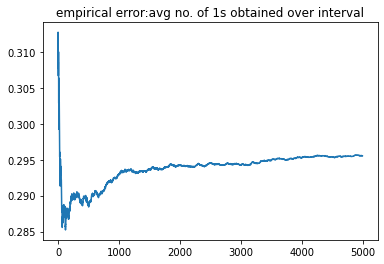

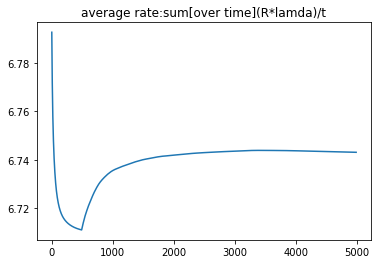

In [42]:
stat = 10
end = 5000
error_plot = 1.0 - np.copy(b)
rate_plot = np.copy(avg_rate)
for i in range(1,len(error_plot)):
    error_plot[i] += (error_plot[i-1]*(i-1))
    error_plot[i] =error_plot[i]/i
plt.plot(error_plot[stat:end])
plt.title('empirical error:avg no. of 1s obtained over interval')
plt.show()
for i in range(1,len(rate_plot)):
    rate_plot[i] += (rate_plot[i-1]*(i-1))
    rate_plot[i] =rate_plot[i]/i
plt.plot(rate_plot[stat:end])
plt.title('average rate:sum[over time](R*lamda)/t')
plt.show()

In [43]:
print(x0.flatten())
print('--------------------------------------------------------------------------')
print(x[end-2].flatten())
print(org_x)
print(error_plot[end-2],tol)
print(rate_plot[end-2],avg_rate[end-2],dot(org_x,R))

[0. 1. 0.]
--------------------------------------------------------------------------
[0.37015758 0.62984242 0.        ]
[0.38797814 0.61202186 0.        ]
0.29549819927969984 0.3
6.7430804924438705 6.7402218101161235 6.775956284153006


In [ ]:
err = [] # 3,3
for i in range(len(p)):
    err.append(np.sum(np.abs(P-p[i]))*100/float(ch*ch))
print(err[0], err[-1])
plt.plot(err[stat:end])
plt.title('estimation error on transition matrix')
plt.show()

9.375 8.277303034308456


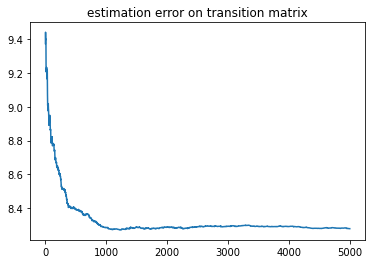

In [32]:
err = [] # 4,5
for i in range(len(p)):
    err.append(np.sum(np.abs(P-p[i]))*100/float(ch*ch))
print(err[0], err[-1])
plt.plot(err[stat:end])
plt.title('estimation error on transition matrix')
plt.show()

In [15]:
# parameters
reg = 0.1 # lambda > 0, regualarization param
conf = 0.1 # delta >= 0, <= 1, confidence prob -> with 1-del prob tolerance holds
alfa_c = 0.001 # >= 1, ellipse radii, best : 0.001
Sa = 1.;La = 1.;Ra = 1. # assumption parameters
R_sum = np.sum(R)
Rn_trans = R/R_sum
Rn = np.transpose([Rn_trans])
# x = [np.transpose(row_normalize([np.ones(en)]))]
x = [x0]
r = [dot(x[-1],Rn)];c = [c0]
b = [0]; enc = [rd.randint(en)];chnl = [rd.randint(ch)]
avg_rate = []
# markov extra param
p = []
# p.append(row_normalize(np.random.rand(ch,ch)))
p.append(row_normalize(np.ones((ch,ch))))
step = 100
lr = 0.01
eps = .5
eps_min = 0.01

In [16]:
# algo
iop = np.identity(en) - (np.matmul(x0,x0.transpose())/pow(norm_x0,2.0))
sigopt = reg*iop; uopt = 0.0
rn = rd.rand()
sprob = steady_state_prob(p[-1])
tolx = tol
for t in range(1,50000):
    enc.append(sample(x[-1].transpose()[0]))
    if rn < max(eps_min,eps/float(t+1)): # put as running eps
        enc.append(rd.randint(0,en))
    else:
        enc.append(sample(x[-1].transpose()[0]))
    chnl.append(sample(P[chnl[-1]]))
    b.append(int(bernoulli(E[enc[-1]][chnl[-1]])))
    if t%step == 0:
        # markov part
        model = hmm.MultinomialHMM(n_components=ch, params='t', init_params='',n_iter=100, tol=1.0e-2)
        model.startprob_ = sprob
        if rn < max(eps_min,eps/float(t+1)):
            step_emiss = np.sum(E,axis=0)/3
        else:
            step_emiss = np.sum(x[-1]*E,axis=0)
        model.emissionprob_ = [[step_emiss[i],1-step_emiss[i]] for i in range(ch)]
        model.transmat_ = np.copy(p[-1])
        model.fit([b[-1*step:]]) #here
        temp = np.copy(p[-1])
        lr = min(lr,1.0/float(t+1)) # adaptive learning rate
        temp = temp + lr*(model.transmat_-temp) # progressive update
        temp = row_normalize(temp)
        p.append(temp)
        # p.append(((p[-1]*float(t))+model.transmat_)/float(t+1))
        sprob = steady_state_prob(p[-1])
        # OPLB
        r.append(dot(x[-1],Rn))
        c.append(np.max([dot(x[-1].transpose(),i) for i in np.matmul(p[-1],E.transpose())]))
        copt = c[-1] - (dot(x[-1],e0)/norm_x0)*c[0]
        xopt = x[-1] - (dot(x[-1],e0)*e0)
        sigopt += np.matmul(xopt,xopt.transpose())
        uopt += (copt*xopt)
        muopt = np.matmul(linalg.pinv(sigopt),uopt) # (inverse is blowing up, singular matrices) so did pseudo(SVD)
        ub = ((c[0]/norm_x0)*e0_trans)+muopt.transpose()-(dot(e0,muopt)*e0_trans)
        betat = Ra*math.sqrt(en*math.log10((1+(t-1)*La*La/reg)/conf))+math.sqrt(reg)*Sa # used log10
        val = alfa_c*betat*linalg.norm(xopt)
        if t > 500:
            tolx = 2*tol - 1.0 + np.mean(b)
        try:
            ltemp = linprog(c = -1*Rn_trans, A_ub = ub, b_ub = [tolx-val],A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-2})
        except:
            print(t,'skipped')
            continue
        rn = rd.rand()
        x.append(np.transpose([ltemp.x]))
        avg_rate.append(dot(x[-1],Rn)*R_sum)
        print(t,round(avg_rate[-1],5),round(1.0-np.mean(b),4),round(np.sum(np.abs(P-p[-1]))*100/float(ch*ch),4),ltemp.success,end='\n')
# print(uopt)
# print(muopt)
# print(ub,betat)

100 8.0 0.1188 4.8452 True
200 8.0 0.1493 4.8453 True
300 7.82306 0.1462 4.8504 True
400 7.71354 0.1496 4.8518 True
500 7.63403 0.1597 4.8519 True
600 8.0 0.173 4.8518 True
700 8.0 0.1769 4.8518 True
800 8.0 0.1723 4.8537 True
900 7.97852 0.182 4.8532 True
1000 7.89126 0.1858 4.8532 True
1100 7.79441 0.1898 4.8531 True
1200 7.8004 0.189 4.8533 True
1300 7.81929 0.1875 4.8535 True
1400 7.73649 0.1906 4.8535 True
1500 7.81473 0.1872 4.8543 True
1600 7.76127 0.1893 4.8543 True
1700 7.75357 0.1893 4.8543 True
1800 7.71982 0.1904 4.8543 True
1900 7.59179 0.1952 4.8539 True
2000 7.64899 0.1929 4.8543 True
2100 7.65052 0.1923 4.8543 True
2200 7.55716 0.1958 4.854 True
2300 7.52251 0.1964 4.854 True
2400 7.53784 0.1958 4.854 True
2500 7.47872 0.1975 4.854 True
2600 7.49459 0.1961 4.8541 True
2700 7.53174 0.1944 4.8544 True
2800 7.45999 0.1967 4.8543 True
2900 7.46715 0.1958 4.8544 True
3000 7.42558 0.1973 4.8544 True
3100 7.29803 0.2006 4.854 True
3200 7.30271 0.2006 4.854 True
3300 7.28394 0.

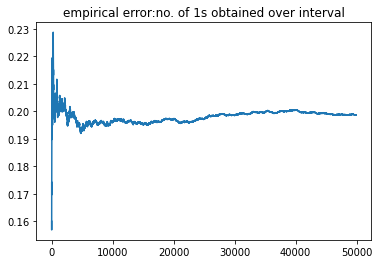

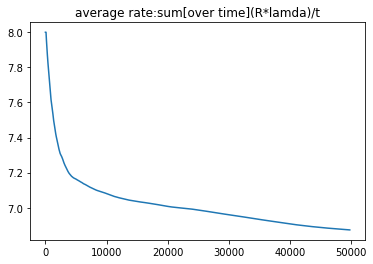

In [28]:
stat = 100 # 6,8
error_plot = 1.0 - np.copy(b)
for i in range(1,len(error_plot)):
    error_plot[i] += (error_plot[i-1]*(i-1))
    error_plot[i] =error_plot[i]/i
plt.plot(error_plot[stat:])
plt.title('empirical error:no. of 1s obtained over interval')
plt.show()
rate_plot = []
for i in avg_rate:
    rate_plot.extend([i]*step)
for i in range(1,len(rate_plot)):
    rate_plot[i] += (rate_plot[i-1]*(i-1))
    rate_plot[i] =rate_plot[i]/i
plt.plot(rate_plot[stat:])
plt.title('average rate:sum[over time](R*lamda)/t')
plt.show()

In [29]:
print(x0.flatten())
print(x[-1].flatten(),error_plot[-1],rate_plot[-1])
print(org_x,tol,dot(org_x,R))

[0.5 0.  0.5 0.  0.  0. ]
[0.         0.         0.         0.79053682 0.20946318 0.        ] 0.19874397487949738 6.873196987078349
[0.         0.         0.22315708 0.77684292 0.         0.        ] 0.2 7.107371690867861


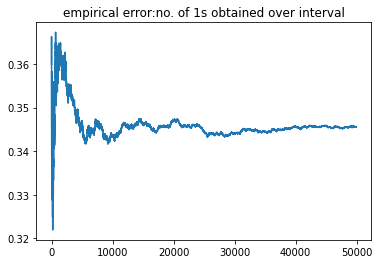

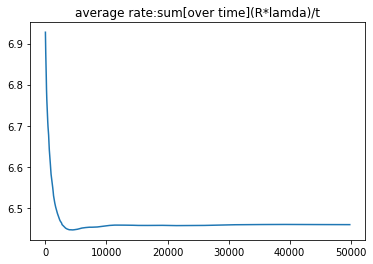

In [17]:
stat = 100 # 4,5
error_plot = 1.0 - np.copy(b)
for i in range(1,len(error_plot)):
    error_plot[i] += (error_plot[i-1]*(i-1))
    error_plot[i] =error_plot[i]/i
plt.plot(error_plot[stat:])
plt.title('empirical error:no. of 1s obtained over interval')
plt.show()
rate_plot = []
for i in avg_rate:
    rate_plot.extend([i]*step)
for i in range(1,len(rate_plot)):
    rate_plot[i] += (rate_plot[i-1]*(i-1))
    rate_plot[i] =rate_plot[i]/i
plt.plot(rate_plot[stat:])
plt.title('average rate:sum[over time](R*lamda)/t')
plt.show()

In [18]:
print(x0.flatten())
print(x[-1].flatten(),error_plot[-1],rate_plot[-1])
print(org_x,tol,dot(org_x,R))

[0.25 0.25 0.5  0.   0.  ]
[ 4.57189728e-01  0.00000000e+00  0.00000000e+00  5.42810272e-01
 -5.55111512e-17] 0.34560691213824507 6.4591416082560915
[0.50100842 0.         0.         0.49899158 0.        ] 0.35 6.50100842330051


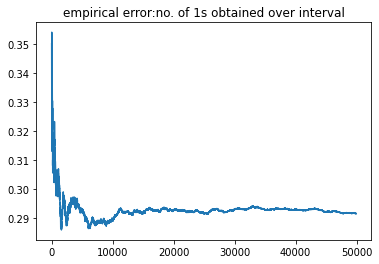

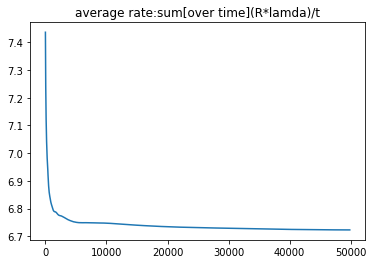

In [10]:
stat = 100 # 3,3
error_plot = 1.0 - np.copy(b)
for i in range(1,len(error_plot)):
    error_plot[i] += (error_plot[i-1]*(i-1))
    error_plot[i] =error_plot[i]/i
plt.plot(error_plot[stat:])
plt.title('empirical error:no. of 1s obtained over interval')
plt.show()
rate_plot = []
for i in avg_rate:
    rate_plot.extend([i]*step)
for i in range(1,len(rate_plot)):
    rate_plot[i] += (rate_plot[i-1]*(i-1))
    rate_plot[i] =rate_plot[i]/i
plt.plot(rate_plot[stat:])
plt.title('average rate:sum[over time](R*lamda)/t')
plt.show()

In [11]:
print(x0.flatten())
print(x[-1].flatten(),error_plot[-1],rate_plot[-1])
print(org_x,tol,dot(org_x,R))

[0. 1. 0.]
[ 3.59699816e-01  6.40300184e-01 -5.55111512e-17] 0.2914258285165726 6.722992469732516
[0.38797814 0.61202186 0.        ] 0.3 6.775956284153006


5.67681828888813


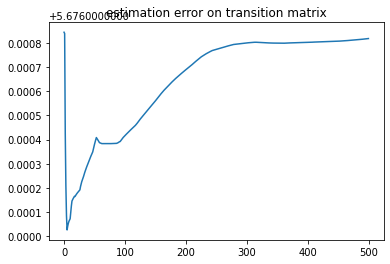

In [30]:
err = []; s = np.shape(P)[0]*np.shape(P)[1]
for i in range(len(p)):
    err.append(np.sqrt(np.sum(np.square(P-p[i]))/s)*100)
    err[i] += (err[i-1]*(i))
    err[i] = err[i]/(i+1)
print(err[-1])
plt.plot(err)
plt.title('estimation error on transition matrix')
plt.show()

[0.12466371 0.12476386 0.12521013 0.12485655 0.12573682 0.12461463
 0.12515706 0.12499725]
[0.13804835 0.11053872 0.09222048 0.16094479 0.14741879 0.10270172
 0.07314543 0.17498172]
5.455245990940675


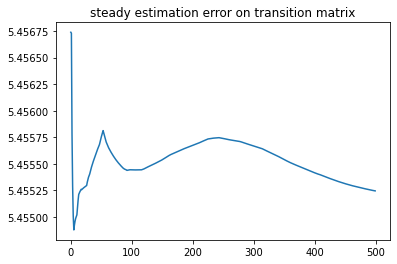

In [31]:
err = []; s = np.shape(P)[0]*np.shape(P)[1]
for i in range(len(p)):
    err.append(np.sqrt(np.sum(np.square(steady_state_prob(P)-steady_state_prob(p[i])))/3)*100)
    err[i] += (err[i-1]*(i))
    err[i] = err[i]/(i+1)
print(steady_state_prob(p[-1]))
print(steady_state_prob(P))
print(err[-1])
plt.plot(err)
plt.title('steady estimation error on transition matrix')
plt.show() 

17.284367565753033


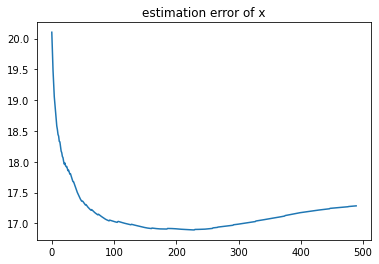

In [32]:
err = []; s = 3
for i in range(len(x)):
    err.append(np.sqrt(np.sum(np.square(org_x-x[i].flatten()))/s)*100)
    err[i] += (err[i-1]*(i))
    err[i] = err[i]/(i+1)
print(err[-1])
plt.plot(err[10:])
plt.title('estimation error of x')
plt.show()

In [57]:
# Rough

In [ ]:
(Ra*math.sqrt(en*math.log10((1+(t-1)*La*La/.1)/0.9))+math.sqrt(.1)*Sa)*linalg.norm(xopt) 

In [ ]:
alfa_c -> lamda error %
0.0 -> 0.7263980978187543
0.0001 -> 0.64
0.001 -> 0.17
0.005 -> 4